Link of the data: https://s3.amazonaws.com/content.udacity-data.com/courses/nd188/flower_data.zip

In [12]:
!rm /content/flower_data.zip
!wget -O /content/flower_data.zip "https://s3.amazonaws.com/content.udacity-data.com/courses/nd188/flower_data.zip"
!unzip /content/flower_data.zip -d /content/flower_data/


Streaming output truncated to the last 5000 lines.
  inflating: /content/flower_data/flower_data/train/7/image_07232.jpg  
  inflating: /content/flower_data/flower_data/train/7/image_08101.jpg  
  inflating: /content/flower_data/flower_data/train/7/image_07226.jpg  
  inflating: /content/flower_data/flower_data/train/7/image_07227.jpg  
  inflating: /content/flower_data/flower_data/train/7/image_08100.jpg  
  inflating: /content/flower_data/flower_data/train/7/image_07233.jpg  
   creating: /content/flower_data/flower_data/train/29/
  inflating: /content/flower_data/flower_data/train/29/image_04152.jpg  
  inflating: /content/flower_data/flower_data/train/29/image_04147.jpg  
  inflating: /content/flower_data/flower_data/train/29/image_04153.jpg  
  inflating: /content/flower_data/flower_data/train/29/image_04151.jpg  
  inflating: /content/flower_data/flower_data/train/29/image_04150.jpg  
  inflating: /content/flower_data/flower_data/train/29/image_04144.jpg  
  inflating: /content/f

# Splitting the train Folder into train and test

In [13]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define the paths for the train directory and the new test directory
train_dir = '/content/flower_data/train'  
test_dir = '/content/flower_data/test'

# Creating test directory
os.makedirs(test_dir, exist_ok=True)

# Looping through each class in the train folder
for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name)
    if os.path.isdir(class_path):
        # Geting all file names in this class folder
        files = os.listdir(class_path)
        # Spliting the files into train and test sets (80% train, 20% test)
        train_files, test_files = train_test_split(files, test_size=0.2, random_state=42)

        # Creating test folder for the class inside test directory
        os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)

        # Moving test files into the test folder
        for file in test_files:
            shutil.move(os.path.join(class_path, file), os.path.join(test_dir, class_name, file))


# Define and Train the Model

In [14]:
import torch
from torch import nn, optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader

# Setup data transformations (Preprocessing)
transform = transforms.Compose([
    transforms.Resize(255),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Loading the datasets
train_dir = '/content/flower_data/train'
valid_dir = '/content/flower_data/test'

train_data = datasets.ImageFolder(train_dir, transform=transform)
valid_data = datasets.ImageFolder(valid_dir, transform=transform)

# Creating DataLoader instances
trainloader = DataLoader(train_data, batch_size=32, shuffle=True)
validloader = DataLoader(valid_data, batch_size=32, shuffle=False)

# Load pre-trained ResNet model and modify the last layer for your classes
model = models.resnet152(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, len(train_data.classes))  

# Defining the loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

# Move model to GPU or CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Training loop
epochs = 5 
for epoch in range(epochs):
    model.train() 
    running_loss = 0
    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)

        # Calculate the loss
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(trainloader)}")

# Save the trained model
torch.save(model.state_dict(), '/content/flower_model.pth')


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet152-394f9c45.pth" to /root/.cache/torch/hub/checkpoints/resnet152-394f9c45.pth
100%|██████████| 230M/230M [00:02<00:00, 84.7MB/s]


Epoch 1/5, Loss: 4.516610454196579
Epoch 2/5, Loss: 3.6595207079787926
Epoch 3/5, Loss: 3.2360637846168565
Epoch 4/5, Loss: 2.995253372777459
Epoch 5/5, Loss: 2.834883676716155


# Model Evaluation and Visualization

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
<ipython-input-43-5c424bcd73de>:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the function

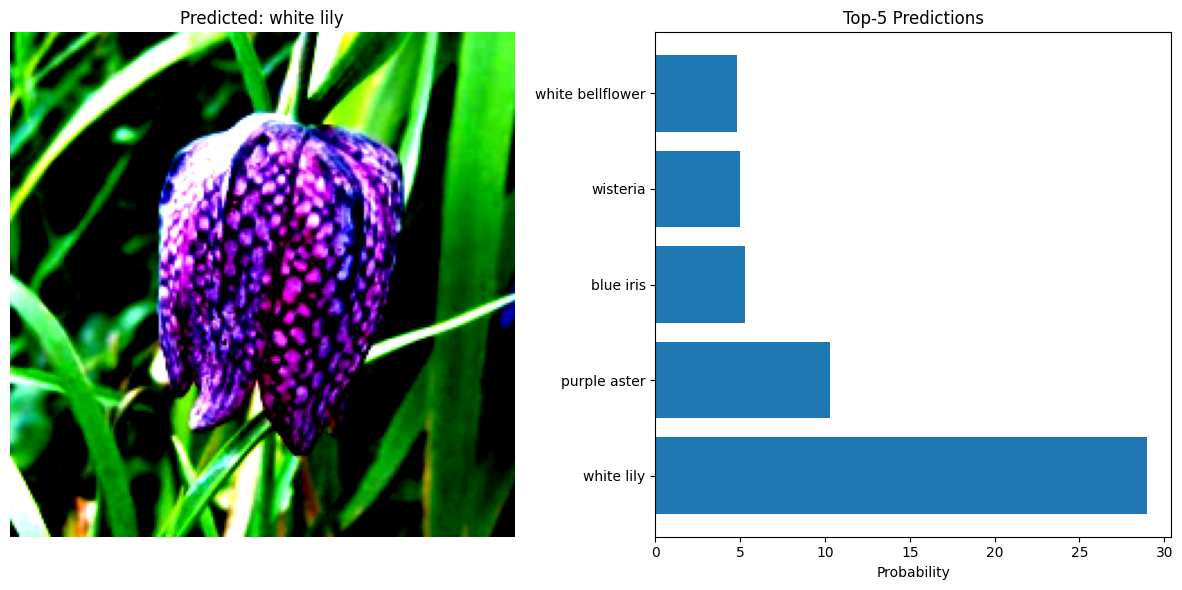

In [43]:
# Load model and other initial setup
import torch
from torchvision import models, transforms
from PIL import Image
import json
from torchvision import datasets
import matplotlib.pyplot as plt
import numpy as np

# Load the custom-trained model
model = models.resnet152(pretrained=False)  # Set pretrained=False since we're loading a custom model
model.fc = torch.nn.Linear(model.fc.in_features, 102)  # Adjust for the number of classes (102 classes in my case)
model.load_state_dict(torch.load('/content/flower_model.pth'))  # Load saved model weights
model.eval()

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Defining the transformations for preprocessing the image
transform = transforms.Compose([
    transforms.Resize(255),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Loading the dataset to create class_to_idx mapping 
dataset = datasets.ImageFolder('/content/flower_data/train', transform=transform)
class_to_idx = dataset.class_to_idx  # Automatically creates the mapping

# Invert class_to_idx to get idx_to_class
idx_to_class = {val: key for key, val in class_to_idx.items()}

# Loading the class-to-name mapping file
with open('/content/flower_data/class_to_name.json', 'r') as f:
    cat_to_name = json.load(f)

# Adjusting the class-to-name mapping to match the 0-based indices used by the model
adjusted_cat_to_name = {str(i): cat_to_name.get(str(i + 1), "Unknown") for i in range(len(cat_to_name))}

# Prediction function
def predict(image_path, topk=5):
    image = Image.open(image_path)
    image = transform(image).unsqueeze(0).to(device)

    # Forward pass
    with torch.no_grad():
        output = model(image)

    # Get the top-k most probable classes
    probs, classes = torch.topk(output, topk)
    probs = torch.exp(probs).cpu().numpy().flatten()
    classes = classes.cpu().numpy().flatten()

    # Converting the indices to class labels using adjusted mapping
    class_labels = [adjusted_cat_to_name.get(str(cls), "Unknown") for cls in classes]

    # Moving image to CPU for visualization
    image = image.cpu().squeeze(0)  # Removing the batch dimension

    return probs, class_labels, image

# Example prediction
image_path = "/content/flower_data/valid/23/image_03444.jpg"  
probs, classes, image = predict(image_path)

# Visualize the result
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the image
ax1.imshow(np.transpose(image.numpy(), (1, 2, 0)))  # Converting image to numpy for visualization
ax1.axis('off')  # Hide axes
ax1.set_title(f"Predicted: {classes[0]}")  # Displaying the name of the top prediction

# Plot the top-k predictions
y_pos = np.arange(len(classes))
ax2.barh(y_pos, probs, align='center')
ax2.set_yticks(y_pos)
ax2.set_yticklabels(classes)
ax2.set_xlabel('Probability')
ax2.set_title('Top-5 Predictions')

plt.tight_layout()
plt.show()


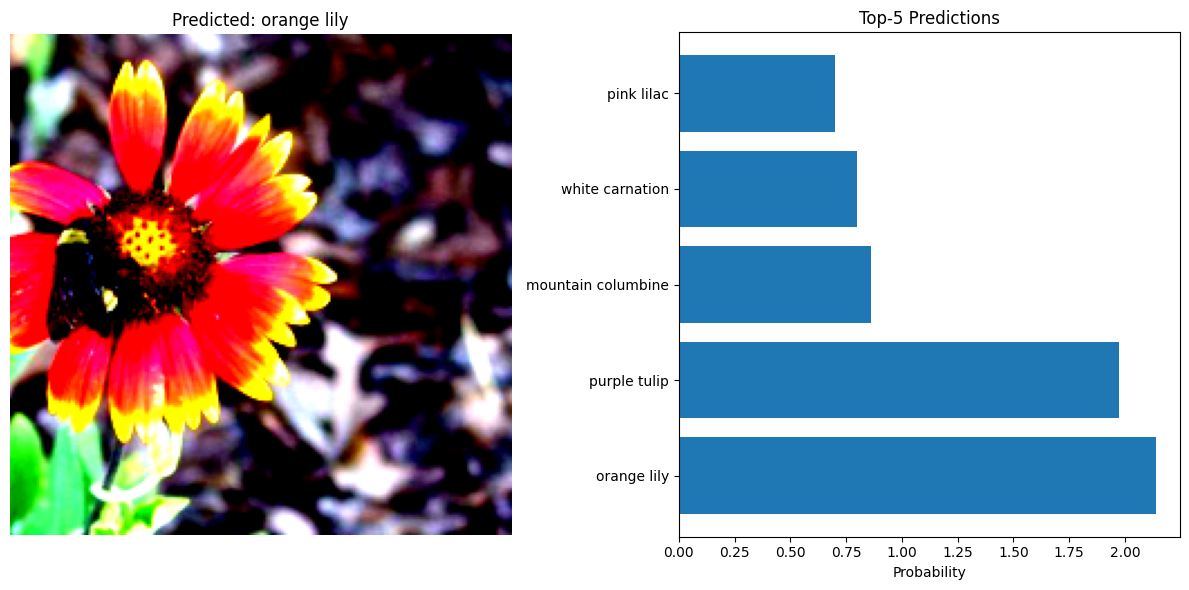

In [41]:
# Example prediction
image_path = "/content/flower_data/test/100/image_07893.jpg"  
probs, classes, image = predict(image_path)

# Visualize the result
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the image
ax1.imshow(np.transpose(image.numpy(), (1, 2, 0)))  
ax1.axis('off')  # Hide axes
ax1.set_title(f"Predicted: {classes[0]}") 

# Plot the top-k predictions
y_pos = np.arange(len(classes))
ax2.barh(y_pos, probs, align='center')
ax2.set_yticks(y_pos)
ax2.set_yticklabels(classes)
ax2.set_xlabel('Probability')
ax2.set_title('Top-5 Predictions')

plt.tight_layout()
plt.show()


### Important note :
- In this data, I couldn't find the JSON file, so I have created the names myself. Therefore, these names of the flowers are not the actual names.
